# **Predicting and Visualization of Heart Diseases**

## **Project Workflow**

This Google Collab Notebook checks wheather a person has Heart Disease or not by using different Python Libraries such as **Numpy**, **Pandas**, **Matplotlib** and **scikit-learn** and predicting the heart disease with the help of their medical conditions or attributes.

### **Approach**

**We are going to take the Following Approach**
1. Problem Definition
2. Required Data
3. Data Evaluation
4. Modelling

### **1. Problem Definition**

Given, In a Statement,
Their are given Parameters about a Patient, can we Predict wheater or not they have a Heart Disease.


### **2. Data Dictionary**

The following dataset we are using can be found in Cleavland data from Machine Learing Repository site   
- https://archive.ics.uci.edu/ml/datasets/heart+disease and from kaggle site   
- https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset


### **3. Data Dictionary Evaluation**

If we can reach 80%+ accuracy in predicting whether or not a patient has heart disease or not during the proof of concept we are pursuing the project. 

**Data Dictionary or Required Data**  

**The Following are the Data Dictionary given to Use**

1. **age**: Displays the age of the individual.

2. **sex**: Displays the gender of the individual using the following format :   
1 = male  
0 = female

3. **cp- Chest-pain type**: displays the type of chest-pain experienced by the individual using the following format :  
0 = typical angina  
1 = atypical angina   
2 = non — anginal pain   
3 = asymptotic

4. **trestbps**- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

5. **chol**- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. **fbs**- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.  
If fasting blood sugar > 120mg/dl then : 1 (true)  
else : 0 (false) '>126' mg/dL signals diabetes

7. **restecg**- Resting ECG : displays resting electrocardiographic results  
0 = normal  
1 = having ST-T wave abnormality  
2 = left ventricular hyperthrophy

8. **thalach**- Max heart rate achieved : displays the max heart rate achieved by an individual.

9. **exang**- Exercise induced angina :  
1 = yes  
0 = no

10. **oldpeak**- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. **slope**- Slope of the peak exercise ST segment :  
0 = upsloping: better heart rate with excercise (uncommon)  
1 = flat: minimal change (typical healthy heart)  
2 = downsloping: signs of unhealthy heart

12. **ca**- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

13. **thal** : Displays the thalassemia :  
1,3 = normal  
6 = fixed defect  
7 = reversible defect: no proper blood movement when excercising

14. **target** : Displays whether the individual is suffering from heart disease or not :  
1 = yes  
0 = no  


## **Preparing our Tools**

In [58]:
# Importing Numpy as np
import numpy as np

# Importing matplotlib as plt to visualize the data
import matplotlib.pyplot as plt

# Importing pandas as pd
import pandas as pd

# Importing train_test_split to train and split the Data
from sklearn.model_selection import train_test_split

# Importing Logistic Regression Model from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

## **Viewing our Data**

In [4]:
# We read our heart_disease_data with the healp of read_csv
heart_data = pd.read_csv("/content/heart_disease_data.csv")

In [5]:
# head() shows the first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# this shows the given number of rows from top from the dataset
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
# tail() shows the last 5 rows for 
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# this shows the given number of rows from bottom from the dataset
heart_data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# ciewing our data
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
# shape gives how many rows and columns are their in our dataset (rows, columns)
heart_data.shape

(303, 14)

In [13]:
# info() shows information about about dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
# isnull().sum() show is their any empty values in our dataset
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
# shows more statistical data about our dataset
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
# shows the value counts of target from our dataset
heart_data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## **Splitting Data into X and y**

In [17]:
# splitting our data into X and y
# in X we store everything except target column
# in y we store only the target column
X = heart_data.drop(columns="target", axis=1)
y = heart_data["target"]

In [23]:
# Viewing both X and y data
X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [21]:
# Viewing the X data
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [22]:
# Viewing the y data
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [24]:
# using train_test_split to split the X and y data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [25]:
# viewing the shape of X, X_train and X_test
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


## **Visualization of Data (Finding Patterns)**

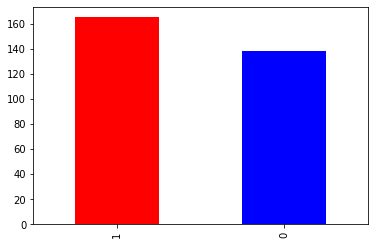

In [44]:
# plotting a bar graph for the patient who has heart disease or not
heart_data["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

### **Heart Disease Frequency According to Gender**

In [45]:
# Heart Disease Frequency according to Gender
heart_data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [46]:
# Compare target column to sex column
pd.crosstab(heart_data.target, heart_data.sex)

sex,0,1
target,,
0,24,114
1,72,93


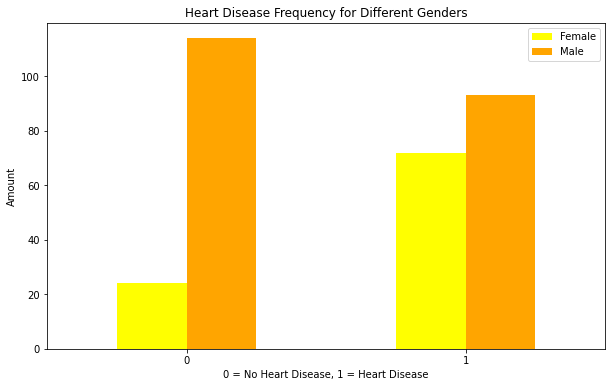

In [48]:
# Create a Plot of crosstab
pd.crosstab(heart_data.target, heart_data.sex).plot(kind="bar", figsize=(10, 6), color=["yellow", "orange"])

# title shows the heading of the Plot
plt.title("Heart Disease Frequency for Different Genders")

# xlabel shows the data required below the plot
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")

# ylabel shows the data required in the side
plt.ylabel("Amount")

# legens shows the data required in the legend
plt.legend(["Female", "Male"])

# shows small ticks between the bars
plt.xticks(rotation=0);

### **Age vs Max Heart Rate for Heart Disease**

In [49]:
# Heart Disease Frequency accounding to Gender
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

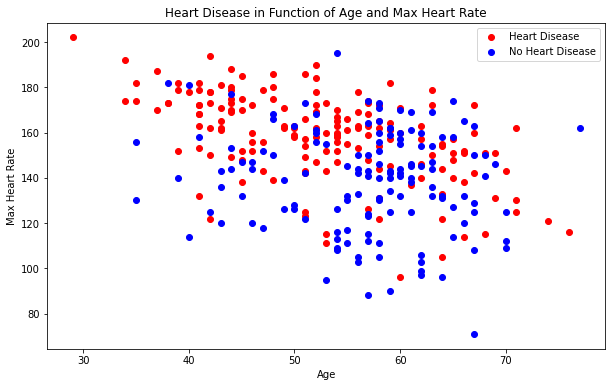

In [50]:
# Creating another figure
plt.figure(figsize = (10,6))

# scatter with positive examples
# age where target is 1 and thalach where target is 1
plt.scatter(heart_data.age[heart_data.target==1],
            heart_data.thalach[heart_data.target==1], c="red")

# scatter with negative examples
# age where target is 0 and thalach where target is 0
plt.scatter(heart_data.age[heart_data.target==0],
            heart_data.thalach[heart_data.target==0], c="blue")

# Adding some helper information
plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease","No Heart Disease"]);

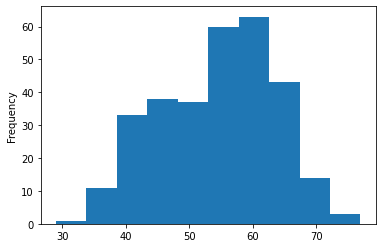

In [51]:
# Checking the Distribution of Age Column with Histogram
df.age.plot.hist();

### **Heart Disease Frequency per Chest Pain type**

**cp- Chest-pain type:** displays the type of chest-pain experienced by the individual using the following format : 
- 0 = typical angina 
-1 = atypical angina 
-2 = non — anginal pain 
-3 = asymptotic

In [53]:
# creating a crosstab between different types of chest pain
pd.crosstab(heart_data.cp,heart_data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


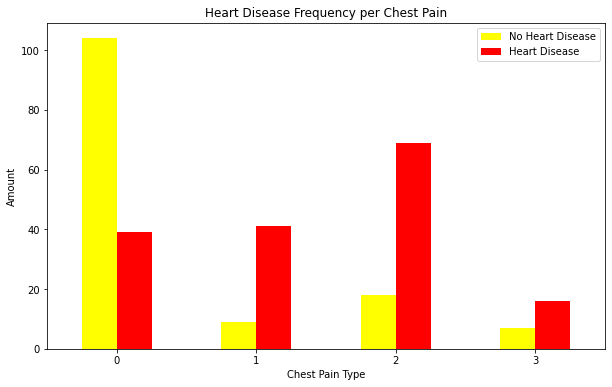

In [54]:
# Make the Crosstab more visual
# making a bar plot between chest pain(cp) and target to make different types of chest pain more visible
pd.crosstab(heart_data.cp, heart_data.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["yellow", "red"])

# Add some Helper Text
plt.title("Heart Disease Frequency per Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

### **Making a Co-relation Matrix**

In [ ]:
heart_data.head()

In [ ]:
# making a corelation matrix
heart_data.corr()

(14.5, -0.5)

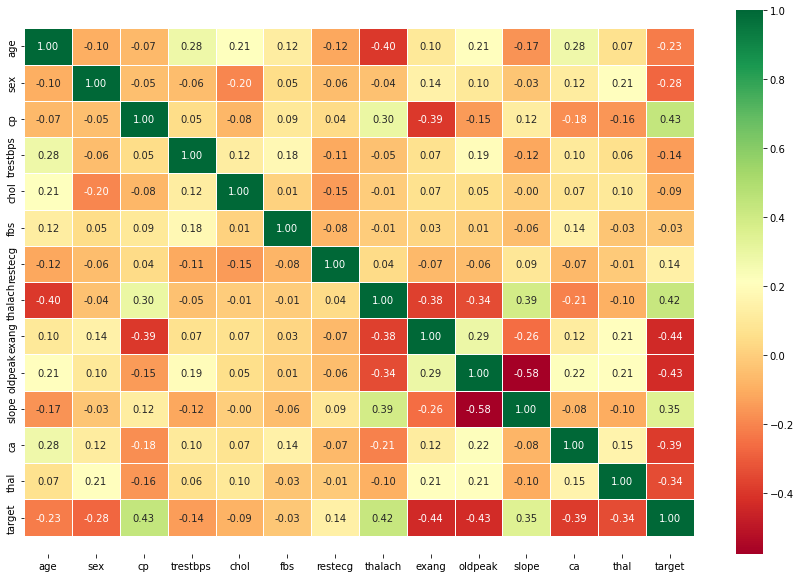

In [57]:
# making correlation matrix a little beautiful
corr_matrix = heart_data.corr()
fig, ax = plt.subplots(figsize=(15, 10))

# using heatmap from seaborn
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="RdYlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


# Negative Correlation: Relationship Between Two Variables in which one variable increases and the other variable Decreases

## **Model Selection and Fitting the Model**

### **Random Forest Classifier**

In [85]:
model_rfc = RandomForestClassifier()

In [86]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
# Accuracy on the Training Data
# Predicting on X_train and storing it in variable named X_train_prediction
X_train_prediction_rfc = model_rfc.predict(X_train)
training_data_accuracy_rfc = accuracy_score(X_train_prediction_rfc, y_train)

In [89]:
# Accuracy on the Test Data
# predicting the accuracy on the test Data and storing it in variable X_test_prediction
X_test_prediction_rfc = model_rfc.predict(X_test)
test_data_accuracy_rfc = accuracy_score(X_test_prediction_rfc, y_test)

In [90]:
# printing the accuracy on test data
print("Accuracy on Test Data:", test_data_accuracy_rfc*100)

Accuracy on Test Data: 78.68852459016394


### **Logistic Regression Model**

In [67]:
# using the Logistic Regression model and storing it in variable known as model
model = LogisticRegression()

In [68]:
# Now using the Logistic Regression Model
# training the model with train datasets
model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
# Accuracy on the Training Data
# Predicting on X_train and storing it in variable named X_train_prediction
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [79]:
# printing the accuracy score
print("Accuracy on Training Data: ",training_data_accuracy*100)

Accuracy on Training Data:  85.12396694214877


In [80]:
# Accuracy on the Test Data
# predicting the accuracy on the test Data and storing it in variable X_test_prediction
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [91]:
# printing the accuracy on test data
print("Accuracy on Test Data:", test_data_accuracy*100)

Accuracy on Test Data: 81.9672131147541


## **Predicting the Data**

We saw that Logistic Regression Model has higher Accuracy in Test Data with 81 so we will use the **Logistic Regression Model** to predict the Data.

In [92]:
# We will give the input Data except the target to check wheather it person has heart disease or not
input_data = (57,1,0,130,131,0,1,115,1,1.2,1,1,3)

# Change the input Data to Numpy Array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the Numpy Arrayas we Predict for only one Instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The Person does not have Heart Disease")
else:
  print("The Person has Heart Disease")

[0]
The Person does not have Heart Disease


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#**-------------------END------------------------------------**